In [ ]:
import numpy as np
import scipy
import librosa as lr
from matplotlib import pyplot as plt
import IPython.display as ipd

850966 samples loaded in 48000 Hz
Total duration: 17.73 seconds
960 320 160


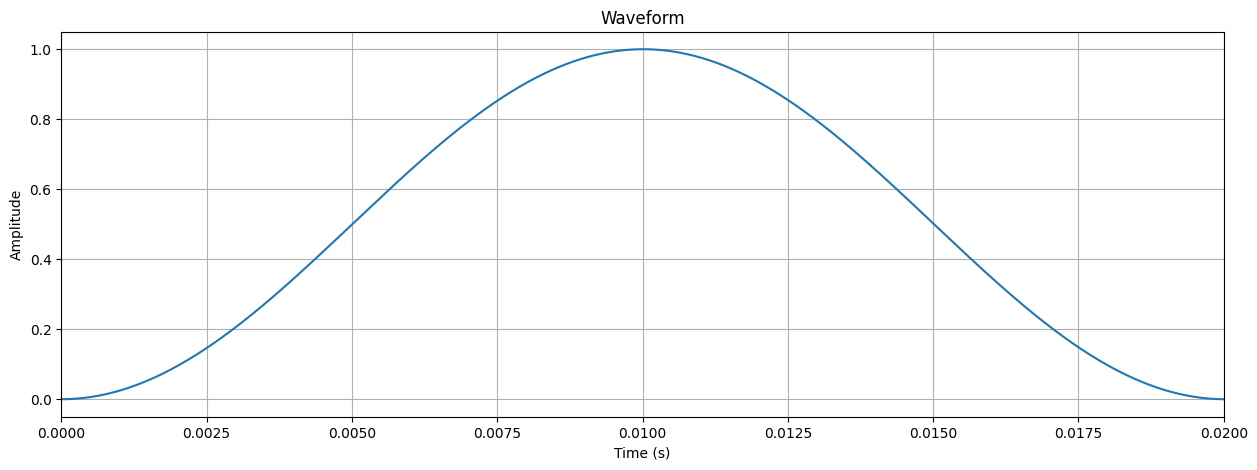

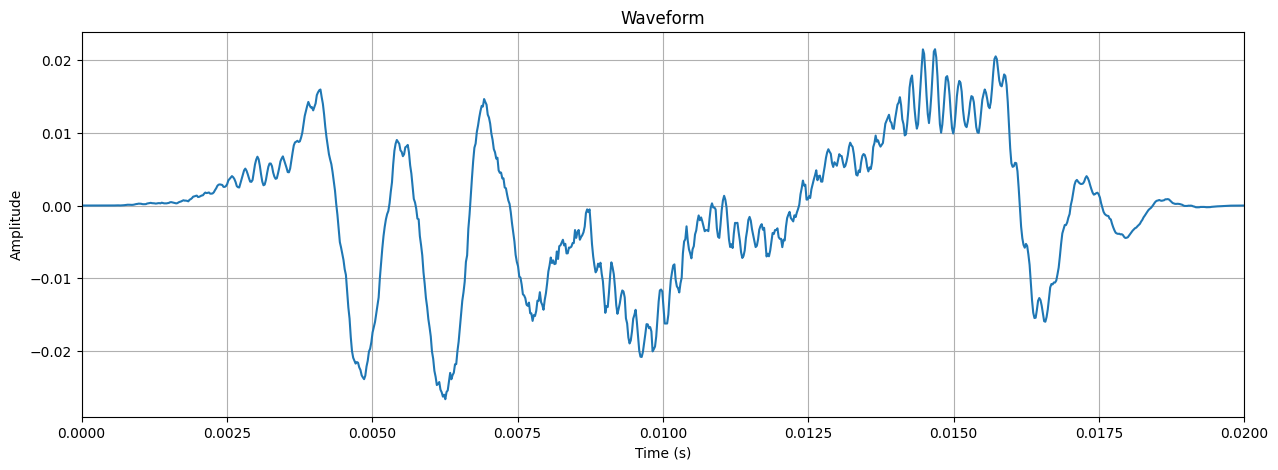

In [104]:
## Load Audio Signal
path = "speech.wav"
def AudioShow(y, sr, title=None):
    time = np.linspace(0, len(y)/sr, len(y))
    plt.figure(figsize=(15, 5))
    plt.plot(time, y)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    if title:
        plt.title(title)
    plt.xlim(0, time[-1])
    plt.grid()
    plt.show()

def AudioRead(path, plotopt=True):
    
    y, sr = lr.load(path, sr=None)
    time = np.linspace(0, len(y)/sr, len(y))
    print("{} samples loaded in {} Hz".format(len(y),sr))
    print(f"Total duration: {time[-1]:.2f} seconds")
    
    if plotopt:
        AudioShow(y, sr)
    return y, sr

# 함수 사용 예
y, sr = AudioRead(path, plotopt=False)

target_sr = 16000
y_16 =lr.resample(y, orig_sr=sr, target_sr=target_sr)
# AudioShow(y_16, sr=16000, title="16kHz")

target_sr = 8000
y_8 =lr.resample(y, orig_sr=sr, target_sr=target_sr)
# AudioShow(y_8, sr=8000, title="8kHz")
# ipd.Audio(y_8,rate=8000, autoplay=True)

# 20 ms at 48 kHz
win_len = int((0.02) * sr)
win_len2 = int(0.02 * 16000)
win_len3 = int(0.02 * 8000)
print(win_len, win_len2, win_len3)

frame = y[72000:72000+win_len]
window = scipy.signal.get_window('hann', win_len)
frame *= window

AudioShow(window, sr=48000)
AudioShow(frame, sr=48000)
ipd.Audio(frame, rate=48000)
